In [2]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

# Load Data, EDA, dan Data Cleansing

In [3]:
#siapkan dataset
df=pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Tidak ada baris yang dan data sudah sesuai dengan bentuknya masing-masing

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Pada dataset, jika duration=0 dan y=0, berarti client belum di contact
# Oleh karena itu hapus data dengan kondisi seperti itu

kondisi=(df['duration']==0) & (df['y']=='no')
df=df[~kondisi]
df.shape

(41184, 21)

### Cek Korelasi

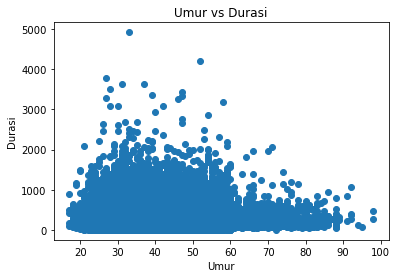

In [7]:
# Korelasi Umur dan Durasi
plt.scatter(df['age'], df['duration']);

plt.title('Umur vs Durasi');
plt.xlabel('Umur');
plt.ylabel('Durasi');

Dari grafik diatas,kita dapat melihat bahwa semakin tua umur maka durasi cenderung semakin rendah. Namun,  umur dan durasi memiliki korelasi negatif yang lemah.

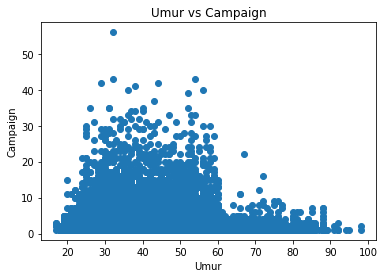

In [8]:
# Korelasi Umur dan Campaign
plt.scatter(df['age'], df['campaign']);

plt.title('Umur vs Campaign');
plt.xlabel('Umur');
plt.ylabel('Campaign');

Dari grafik diatas,kita dapat melihat bahwa semakin tua umur maka client akan semakin sedikit dihubungi selama masa campaign. 

In [9]:
# Angka korelasi antar kolom
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000815,0.004468,-0.034381,0.024384,-0.000395,0.000870,0.129366,0.010745,-0.017755
duration,-0.000815,1.000000,-0.071633,-0.047560,0.020608,-0.027993,0.005275,-0.008194,-0.032926,-0.044724
campaign,0.004468,-0.071633,1.000000,0.052574,-0.079122,0.150711,0.127855,-0.013809,0.135091,0.144052
pdays,-0.034381,-0.047560,0.052574,1.000000,-0.587512,0.271022,0.078899,-0.091344,0.296921,0.372620
previous,0.024384,0.020608,-0.079122,-0.587512,1.000000,-0.420520,-0.203151,-0.050947,-0.454530,-0.501358
emp.var.rate,-0.000395,-0.027993,0.150711,0.271022,-0.420520,1.000000,0.775331,0.195953,0.972242,0.906965
cons.price.idx,0.000870,0.005275,0.127855,0.078899,-0.203151,0.775331,1.000000,0.058916,0.688217,0.522020
cons.conf.idx,0.129366,-0.008194,-0.013809,-0.091344,-0.050947,0.195953,0.058916,1.000000,0.277603,0.100436
euribor3m,0.010745,-0.032926,0.135091,0.296921,-0.454530,0.972242,0.688217,0.277603,1.000000,0.945155
nr.employed,-0.017755,-0.044724,0.144052,0.372620,-0.501358,0.906965,0.522020,0.100436,0.945155,1.000000


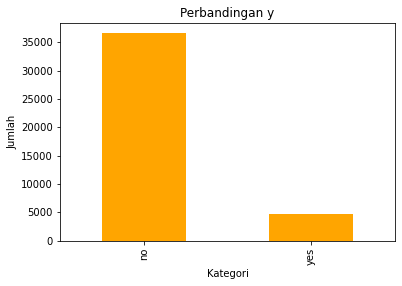

In [10]:
df['y'].value_counts().plot.bar(color='orange');

plt.title('Perbandingan y');
plt.xlabel('Kategori');
plt.ylabel('Jumlah');

Dari grafik diatas terlihat jumlah client yang *subscribe* deposito jauh lebih sedikit dibanding yang tidak *subscribe*

# Modelling Machine Learning

In [11]:
# pisahkan fitur dan label
X=df.drop(['y'], axis=1)
y=df['y']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32947 entries, 5882 to 10864
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32947 non-null  int64  
 1   job             32947 non-null  object 
 2   marital         32947 non-null  object 
 3   education       32947 non-null  object 
 4   default         32947 non-null  object 
 5   housing         32947 non-null  object 
 6   loan            32947 non-null  object 
 7   contact         32947 non-null  object 
 8   month           32947 non-null  object 
 9   day_of_week     32947 non-null  object 
 10  duration        32947 non-null  int64  
 11  campaign        32947 non-null  int64  
 12  pdays           32947 non-null  int64  
 13  previous        32947 non-null  int64  
 14  poutcome        32947 non-null  object 
 15  emp.var.rate    32947 non-null  float64
 16  cons.price.idx  32947 non-null  float64
 17  cons.conf.idx   32947 non-nu

In [13]:
num_cols=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
cat_cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

Pada proses , kolom dibagi kedalam 2 kelompok, yaitu numerik dan kategorik. Hal ini diperlukan karena kedua jenis kolom akan diperlakukan dengan sedikit berbeda

### Membuat Pipeline

In [14]:
# kolom numerik pada pipeline akan di imputasi dengan SimpleImputer dan di scaling dengan StandardScaler
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

# kolom kategorik pada pipeline akan di encoding dengan OneHotEncoder
cat_pipeline=make_pipeline(OneHotEncoder())

# 2 proses diatas akan digabung menjadi satu di pipeline dengan ColumnTransformer
data_preprocess = ColumnTransformer([
    ('preprocess_num', num_pipeline, num_cols),
    ('preprocess_cat', cat_pipeline, cat_cols)
])

# Buat pipeline dengan berbagai model
ml_pipeline_LogReg = make_pipeline(data_preprocess, LogisticRegression())
ml_pipeline_KNN = make_pipeline(data_preprocess, KNeighborsClassifier())
ml_pipeline_SVM = make_pipeline(data_preprocess, LinearSVC())
ml_pipeline_DT = make_pipeline(data_preprocess, DecisionTreeClassifier())
ml_pipeline_RF = make_pipeline(data_preprocess, RandomForestClassifier())
ml_pipeline_NB = make_pipeline(data_preprocess, GaussianNB())

In [15]:
# train data dengan berbagai model
ml_pipeline_LogReg.fit(X_train, y_train)
ml_pipeline_KNN.fit(X_train, y_train)
ml_pipeline_SVM.fit(X_train, y_train)
ml_pipeline_DT.fit(X_train, y_train)
ml_pipeline_RF.fit(X_train, y_train)
ml_pipeline_NB.fit(X_train, y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('preprocess_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('preprocess_cat',
                            

### Logistic Regression

In [17]:
y_pred_LogReg = ml_pipeline_LogReg.predict(X_test)
print(confusion_matrix(y_test, y_pred_LogReg))
print(classification_report(y_test, y_pred_LogReg))

[[7086  232]
 [ 537  382]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7318
         yes       0.62      0.42      0.50       919

    accuracy                           0.91      8237
   macro avg       0.78      0.69      0.72      8237
weighted avg       0.90      0.91      0.90      8237



Model Logistic Regression menghasilkan f1 score yang lumayan tinggi pada label no sedangkan pada label yes nilanya rendah

### K-Nearest Neighbors

In [18]:
y_pred_KNN = ml_pipeline_KNN.predict(X_test)
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))


[[7036  282]
 [ 518  401]]
              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7318
         yes       0.59      0.44      0.50       919

    accuracy                           0.90      8237
   macro avg       0.76      0.70      0.72      8237
weighted avg       0.89      0.90      0.90      8237



Model K-Nearest Neighbors (KNN) menghasilkan f1 score yang mirip dengan model Logistic Regression, namun waktu pemrosesannya jauh lebih lambat

### Support Vector Machine

In [19]:
y_pred_SVM = ml_pipeline_SVM.predict(X_test)
print(confusion_matrix(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

[[7138  180]
 [ 584  335]]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7318
         yes       0.65      0.36      0.47       919

    accuracy                           0.91      8237
   macro avg       0.79      0.67      0.71      8237
weighted avg       0.89      0.91      0.90      8237



Dalam kasus ini model Support Vector Machine tidak lebih baik dari model sebelumnya, meskipun waktu pemrosesannya tidak selama model KNN

### Decision Tree

In [20]:
y_pred_DT = ml_pipeline_DT.predict(X_test)
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))

[[6874  444]
 [ 398  521]]
              precision    recall  f1-score   support

          no       0.95      0.94      0.94      7318
         yes       0.54      0.57      0.55       919

    accuracy                           0.90      8237
   macro avg       0.74      0.75      0.75      8237
weighted avg       0.90      0.90      0.90      8237



Hasil dari model Decision Tree lebih baik dari model sebelumnya, terutama dalam memproses label yes dan waktu pemrosesannya cepat

### Random Forest

In [21]:
y_pred_RF = ml_pipeline_RF.predict(X_test)
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

[[7096  222]
 [ 489  430]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7318
         yes       0.66      0.47      0.55       919

    accuracy                           0.91      8237
   macro avg       0.80      0.72      0.75      8237
weighted avg       0.90      0.91      0.91      8237



Sejauh ini model Random Forest lebih baik dari model sebelumnya secara keseluruhan, walapun untuk bagian label yes masih tergolong rendah

### Naive Bayes

In [22]:
y_pred_NB = ml_pipeline_NB.predict(X_test)
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

[[6008 1310]
 [ 290  629]]
              precision    recall  f1-score   support

          no       0.95      0.82      0.88      7318
         yes       0.32      0.68      0.44       919

    accuracy                           0.81      8237
   macro avg       0.64      0.75      0.66      8237
weighted avg       0.88      0.81      0.83      8237



Model Naive Bayes menghasilkan f1 score yang lebih rendah pada kedua label dibanding model lainnya. Mungkin model naive bayes memang tidak cocok digunakan untuk kasus seperti ini

# Conclusion

Dari seluruh  percobaan yang dilakukan, model Random Forest yang paling baik dari semua model yang ada. Selain f-1 score nya yang tinggi, model ini juga memiliki waktu pemrosesannya yang cepat.

Walaupun dari seluruh percobaan untuk f-1 score pada label yes masih tergolong rendah, namun hal itu bisa dipahami sehubungan dengan data training yang perbandingan antara label yes dan no sangat berbanding jauh.

Selain itu, untuk kasus ini kondisi false positive pada label yes dan false negative pada label no sebaiknya lebih diperhatikan. Karena akan lebih baik bagi pihak bank untuk menganggap client belum *subscribe* deposito daripada menganggapnya sudah melakukannya. Karena dengan menganggap client belum *subscribe* deposito, maka client tersebut bisa di hubungi kembali oleh pihak bank untuk memastikannya.